In [2]:
import pandas as pd
df = pd.read_csv('data_dt.csv')
df.head()

,ID,Age,Income,Gender,Martial Status,Buys
0,1,0-21,High,Male,Single,No
1,2,0-21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,35-100,Medium,Male,Single,Yes
4,5,35-100,Low,Female,Single,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['Income'] = le.fit_transform(df['Income'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Martial Status'] = le.fit_transform(df['Martial Status'])
df['Buys'] = le.fit_transform(df['Buys'])
df

,ID,Age,Income,Gender,Martial Status,Buys
0,1,0,0,1,1,0
1,2,0,0,1,0,0
2,3,1,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1
5,6,2,1,0,0,0
6,7,1,1,0,0,1
7,8,0,2,1,1,0
8,9,0,1,0,0,1
9,10,2,2,0,1,1


In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1], df.iloc[:,-1], test_size=0.3,
random_state=5)
print(len(X_train))
print(len(X_test))
X_train

9
5


,Age,Income,Gender,Martial Status
13,2,2,1,0
11,1,2,1,0
4,2,1,0,1
8,0,1,0,0
9,2,2,0,1
0,0,0,1,1
12,1,0,0,1
6,1,1,0,0
3,2,2,1,1


In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [15]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

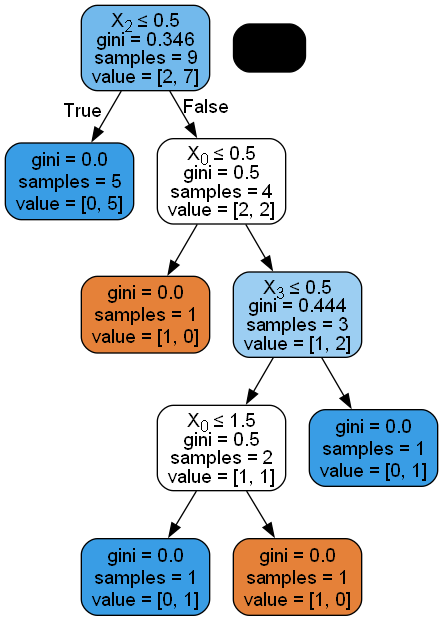

In [16]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [17]:
model.score(X_test, y_test)

0.8

In [18]:
model.predict([[0,1,0,0]])

c:\Users\Kanishk Singhania\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[2, 1],
       [0, 2]], dtype=int64)